In [1]:

from sklearn.datasets import load_boston
import pandas as pd
from pandas_profiling import ProfileReport
from matplotlib import pyplot as plt
import numpy as np

In [2]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:

df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
from pandas_profiling import ProfileReport

In [8]:
profile = ProfileReport(df)

TypeError: ignored

In [ ]:
profile.to_file('boston_profile.html')

In [9]:
df['target'] = boston.target

In [10]:
df.shape

(506, 14)

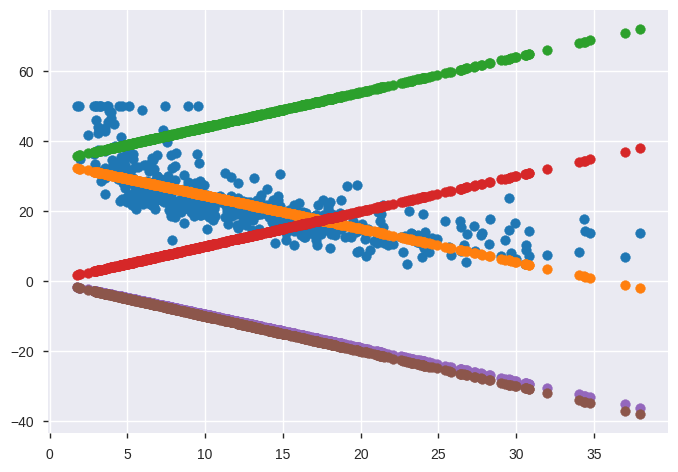

In [12]:
plt.scatter(df.LSTAT, df.target)
plt.scatter(df.LSTAT, -.95*df.LSTAT + 34)

# lets learn the first model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = df.LSTAT; y = df.target

In [ ]:
lr = LinearRegression()

In [ ]:
x.values.shape

(506,)

In [ ]:
x = x.values.reshape(-1,1)
y = y.values

In [ ]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.coef_

array([-0.95004935])

In [ ]:
lr.intercept_

34.5538408793831

In [ ]:
lr.score(x, y)

0.5441462975864797

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mean_absolute_error(y, yhat)

4.505281166250568

In [ ]:
np.sqrt(mean_squared_error(y, yhat))

6.20346413142642

In [ ]:
yhat = lr.predict(x)

# split train, test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = df.sample(frac=1)

In [ ]:
train, test = train_test_split(df)

In [ ]:
train.shape, test.shape

((379, 14), (127, 14))

In [ ]:
train_cols = ['LSTAT', 'RM']
target_col = 'target'
xtrain = train[train_cols]
xtest = test[train_cols]
ytrain = train[target_col]
ytest = test[target_col]

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
r = Ridge(alpha=1)

In [ ]:
r.fit(xtrain, ytrain)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
yhat_test = r.predict(xtest)

In [ ]:
yhat_test.shape

(127,)

In [ ]:
r2_score(ytest, yhat_test), mean_absolute_error(ytest, yhat_test)

(0.648116099875904, 3.544868686201023)

In [ ]:
r.coef_, r.intercept_

(array([-0.62970915,  5.38173533]), -3.2841207498290466)

# Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [ ]:
scaler = RobustScaler()

In [ ]:
xtrain = scaler.fit_transform(xtrain)

In [ ]:
scaler.center_, scaler.scale_

(array([10.63 ,  6.216]), array([9.8  , 0.717]))

In [ ]:
xtest = scaler.transform(xtest)

In [ ]:
r = Ridge()

In [ ]:
r.fit(xtrain, ytrain)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
r.score(xtest, ytest)

0.6476612092504427

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

In [ ]:
cross_val_score(estimator=LinearRegression(), X=xtrain, y=ytrain, cv=5)

array([0.64305411, 0.59416508, 0.65112484, 0.62629806, 0.60566263])

In [ ]:
cross_validate()

In [ ]:
cross_val_predict()